In [1]:
#load imbalanced data
import pandas as pd
df=pd.read_csv('unbalanced_dataset.csv')

In [2]:
#view
df.head()

,Rating,Review
0,1.0,selfie camera is too worst and the images comi...
1,1.0,very bad product does not work properly even a...
2,1.0,just bought apple iphone s on monday i am disa...
3,1.0,so far having a lot of trouble i am a amazon p...
4,1.0,this phone is not worth for k amount as featur...


1.stop word removal

In [3]:
#install & import required libraries
import nltk
nltk.download('stopwords')

from nltk.corpus import stopwords
import string

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [4]:
#defining stopword removal function
stop_words = set(stopwords.words('english'))
punctuations = string.punctuation

def remove_stopwords(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = ''.join([char for char in text if char not in punctuations])
    # Tokenize and remove stopwords
    words = text.split()
    filtered = [word for word in words if word not in stop_words]
    return ' '.join(filtered)

In [5]:
#apply function to imbalanced data
df['Review'] = df['Review'].astype(str).apply(remove_stopwords)

In [6]:
#view
df['Review'].head()

0    selfie camera worst images coming worst mp pho...
1    bad product work properly even replacing want ...
2    bought apple iphone monday disappointing first...
3    far lot trouble amazon prime member alexa keep...
4              phone worth k amount features also good
Name: Review, dtype: object

In [7]:
#print sample stop words
from nltk.corpus import stopwords

# Load English stopwords
stop_words = set(stopwords.words('english'))

# Print first 20 stopwords
print("Sample Stop Words:")
print(list(stop_words)[:20])

Sample Stop Words:
["shan't", 'they', 'too', 'mustn', 'wouldn', "you've", "i'm", 'yours', "he'd", 'and', 'm', 'didn', 'had', 'not', "didn't", "i'd", 'while', 'by', 'll', 'was']


2.Lemmatization

In [8]:
#required libraries
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\User\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


In [9]:
#defining lemmatization function
lemmatizer = WordNetLemmatizer()

def lemmatize_text(text):
    words = text.split()
    lemmatized = [lemmatizer.lemmatize(word) for word in words]
    return ' '.join(lemmatized)

In [10]:
#apply function on imbalanced data
df['Review'] = df['Review'].apply(lemmatize_text)

In [11]:
#view
df['Review'].head()

0    selfie camera worst image coming worst mp phon...
1    bad product work properly even replacing want ...
2    bought apple iphone monday disappointing first...
3    far lot trouble amazon prime member alexa keep...
4               phone worth k amount feature also good
Name: Review, dtype: object

3.filter out long & short reviews

In [12]:
# Count reviews with fewer than 3 words
short_reviews_count = df['Review'].apply(lambda x: len(x.split()) < 3).sum()

# Count reviews with more than 100 words (or any threshold you prefer)
long_reviews_count = df['Review'].apply(lambda x: len(x.split()) > 200).sum()

print(f"Reviews with fewer than 3 words: {short_reviews_count}")
print(f"Reviews with more than 100 words: {long_reviews_count}")

Reviews with fewer than 3 words: 603
Reviews with more than 100 words: 31


In [13]:
# Keep only reviews that have word count between 3 and 200
filtered_df = df[df['Review'].apply(lambda x: 3 <= len(x.split()) <= 200)].reset_index(drop=True)

In [14]:
#rating class distribution
filtered_df['Rating'].value_counts().sort_index()

Rating
1.0     932
2.0    1398
3.0    2374
4.0    2837
5.0    1825
Name: count, dtype: int64

In [15]:
#check nulls
filtered_df.isnull().sum()

Rating    0
Review    0
dtype: int64

In [16]:
#check duplicates
filtered_df.duplicated().sum()

np.int64(441)

In [17]:
#remove duplicate
filtered_df.drop_duplicates(inplace=True)

In [18]:
#rating class distribution
filtered_df['Rating'].value_counts().sort_index()

Rating
1.0     904
2.0    1221
3.0    2209
4.0    2773
5.0    1818
Name: count, dtype: int64

4.visualizations

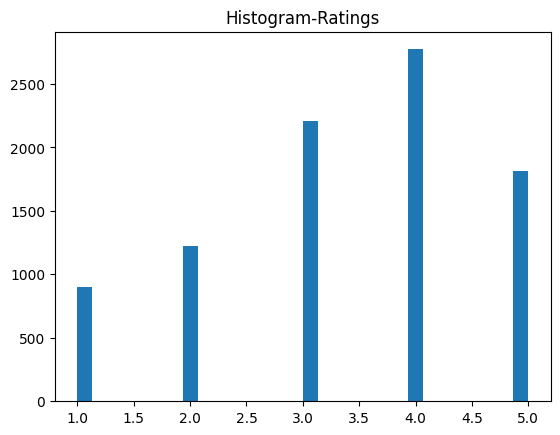

In [19]:
import matplotlib.pyplot as plt
#histogram of rating
plt.hist(filtered_df['Rating'],bins=30)
plt.title('Histogram-Ratings')
plt.show()

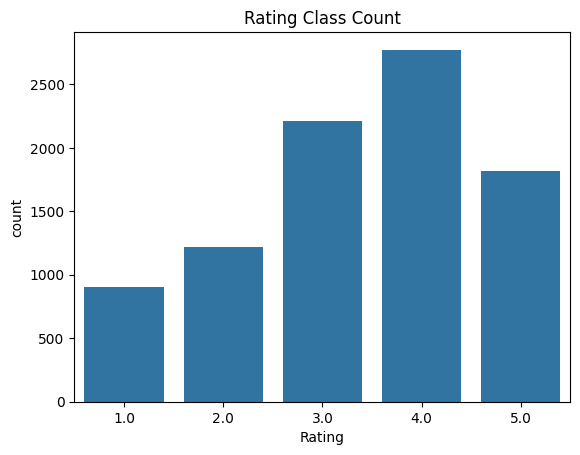

In [21]:
import seaborn as sns
#Count plot (for categorical data)
sns.countplot(x='Rating', data=filtered_df)
plt.title("Rating Class Count")
plt.show()

5.shuffle data

In [22]:
# Shuffle the imbalanced data
imbalanced_df_final = filtered_df.sample(frac=1, random_state=42).reset_index(drop=True)

In [23]:
#view
imbalanced_df_final.head()

,Rating,Review
0,4.0,battery life really low one opt plus model
1,4.0,card work well purchased gb use phone store lo...
2,1.0,product recieved working remote getting paired
3,5.0,great fit easy dress lovely shade bluethis def...
4,4.0,work great wish voice text capability phone in...


6.display sample reviews per rating

In [24]:
for rating in sorted(imbalanced_df_final['Rating'].unique()):
    print(f"\n Rating: {int(rating)}")
    samples = imbalanced_df_final[imbalanced_df_final['Rating'] == rating].sample(3, random_state=42)
    for i, review in enumerate(samples['Review'].values, 1):
        print(f"{i}. {review}\n")


 Rating: 1
1. overall seemed like decent phone point time show network availableemergency call another phone show almost full bar network tried rebooting airplane mode reset network nothing work sure firmware issue o issue make using phone precarious experience expected better

2. one month used phone battery life good video camera quality good hitting problem charger front camera good

3. card worked great first ive never problem sandisk past bought card galaxy back october dead december im sorely disappointed purchase maybe faulty card experience terrible get one star


 Rating: 2
1. disappointed ordered dress large big returned asked exchange size medium apparently available medium charged fee return shopping immediately went website medium available pay another shipping seems bit unreasonable really liked dress

2. problem processing suddenly stop operation n go sleep mode keypad function erroneously automatically start erasing whatever typevery strange

3. overall device fine cam

7.TRain-test-split

In [25]:
from sklearn.model_selection import train_test_split

# Features and labels
X = imbalanced_df_final['Review']
y = imbalanced_df_final['Rating']

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

8.TF-IDF Vectorization

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Initialize TF-IDF vectorizer
tfidf = TfidfVectorizer(max_features=5000)  # or use None for all features

# Fit on training data and transform both train and test
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)